In [ ]:
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, InputLayer
import matplotlib.pyplot as plt
import math

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train_full = x_train_full.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

# Split validation (4:1)
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
def build_cnn_model(conv_layers, filters, kernel_sizes, pooling='max'):
    model = Sequential()
    model.add(InputLayer(input_shape=(32, 32, 3)))

    for i in range(conv_layers):
        model.add(Conv2D(filters[i], kernel_size=kernel_sizes[i], activation='relu', padding='same'))
        if pooling == 'max':
            model.add(MaxPooling2D(pool_size=(2, 2)))
        elif pooling == 'avg':
            model.add(AveragePooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [7]:

configs = [
    # Jumlah Layer Konvolusi
    {'id': 'conf01', 'conv_layers': 1, 'filters': [32], 'kernel_sizes': [3]},
    {'id': 'conf02', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [3, 3]},
    {'id': 'conf03', 'conv_layers': 3, 'filters': [32, 64, 128], 'kernel_sizes': [3, 3, 3]},

    # Jumlah Filter
    {'id': 'conf04', 'conv_layers': 2, 'filters': [16, 32], 'kernel_sizes': [3, 3]},
    {'id': 'conf05', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [3, 3]},
    {'id': 'conf06', 'conv_layers': 2, 'filters': [64, 128], 'kernel_sizes': [3, 3]},

    # Ukuran Kernel
    {'id': 'conf07', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [3, 3]},
    {'id': 'conf08', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [5, 5]},
    {'id': 'conf09', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [7, 7]},

    # Variasi Pooling
    {'id': 'conf10', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [3, 3], 'pooling': 'max'},
    {'id': 'conf11', 'conv_layers': 2, 'filters': [32, 64], 'kernel_sizes': [3, 3], 'pooling': 'avg'},
]



In [ ]:
results = []

for config in configs:
    print(f"Training model: {config['id']}")

    model = build_cnn_model(
        conv_layers=config['conv_layers'],
        filters=config['filters'],
        kernel_sizes=config['kernel_sizes'],
        pooling=config.get('pooling', 'max')  # default ke 'max' jika tidak ditentukan
    )

    history = model.fit(
        x_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(x_val, y_val),
        verbose=2
    )

    y_pred = model.predict(x_test).argmax(axis=1)
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'id': config['id'],
        'config': config,
        'history': history.history,
        'f1_score': f1
    })

    model.save_weights(f"model_weights_{config['id']}.weights.h5")


Training model: conf01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 35s - 55ms/step - accuracy: 0.4194 - loss: 1.6187 - val_accuracy: 0.5100 - val_loss: 1.3939
Epoch 2/10
625/625 - 39s - 63ms/step - accuracy: 0.5371 - loss: 1.3104 - val_accuracy: 0.5596 - val_loss: 1.2700
Epoch 3/10
625/625 - 41s - 66ms/step - accuracy: 0.5790 - loss: 1.2024 - val_accuracy: 0.5694 - val_loss: 1.2382
Epoch 4/10
625/625 - 43s - 68ms/step - accuracy: 0.6050 - loss: 1.1348 - val_accuracy: 0.6000 - val_loss: 1.1554
Epoch 5/10
625/625 - 42s - 68ms/step - accuracy: 0.6259 - loss: 1.0754 - val_accuracy: 0.6008 - val_loss: 1.1535
Epoch 6/10
625/625 - 38s - 61ms/step - accuracy: 0.6431 - loss: 1.0191 - val_accuracy: 0.6037 - val_loss: 1.1308
Epoch 7/10
625/625 - 40s - 64ms/step - accuracy: 0.6585 - loss: 0.9803 - val_accuracy: 0.6250 - val_loss: 1.0987
Epoch 8/10
625/625 - 41s - 65ms/step - accuracy: 0.6759 - loss: 0.9360 - val_accuracy: 0.6258 - val_loss: 1.0979
Epoch 9/10
625/625 - 38s - 60ms/step - accuracy: 0.6894 - loss: 0.8974 - val_accuracy: 0.6337 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 67s - 107ms/step - accuracy: 0.4456 - loss: 1.5489 - val_accuracy: 0.5315 - val_loss: 1.3376
Epoch 2/10
625/625 - 65s - 105ms/step - accuracy: 0.5908 - loss: 1.1620 - val_accuracy: 0.6182 - val_loss: 1.0999
Epoch 3/10
625/625 - 68s - 109ms/step - accuracy: 0.6397 - loss: 1.0279 - val_accuracy: 0.6483 - val_loss: 1.0101
Epoch 4/10
625/625 - 79s - 127ms/step - accuracy: 0.6702 - loss: 0.9413 - val_accuracy: 0.6580 - val_loss: 0.9835
Epoch 5/10
625/625 - 67s - 107ms/step - accuracy: 0.6939 - loss: 0.8804 - val_accuracy: 0.6674 - val_loss: 0.9517
Epoch 6/10
625/625 - 79s - 127ms/step - accuracy: 0.7151 - loss: 0.8202 - val_accuracy: 0.6821 - val_loss: 0.9310
Epoch 7/10
625/625 - 64s - 102ms/step - accuracy: 0.7277 - loss: 0.7824 - val_accuracy: 0.6720 - val_loss: 0.9493
Epoch 8/10
625/625 - 66s - 105ms/step - accuracy: 0.7434 - loss: 0.7331 - val_accuracy: 0.6915 - val_loss: 0.9054
Epoch 9/10
625/625 - 81s - 129ms/step - accuracy: 0.7600 - loss: 0.6833 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 94s - 150ms/step - accuracy: 0.4417 - loss: 1.5383 - val_accuracy: 0.5733 - val_loss: 1.2317
Epoch 2/10
625/625 - 92s - 147ms/step - accuracy: 0.6072 - loss: 1.1177 - val_accuracy: 0.6508 - val_loss: 1.0057
Epoch 3/10
625/625 - 145s - 232ms/step - accuracy: 0.6752 - loss: 0.9321 - val_accuracy: 0.6740 - val_loss: 0.9386
Epoch 4/10
625/625 - 146s - 233ms/step - accuracy: 0.7115 - loss: 0.8259 - val_accuracy: 0.7028 - val_loss: 0.8657
Epoch 5/10
625/625 - 140s - 225ms/step - accuracy: 0.7469 - loss: 0.7341 - val_accuracy: 0.7103 - val_loss: 0.8561
Epoch 6/10
625/625 - 139s - 223ms/step - accuracy: 0.7698 - loss: 0.6671 - val_accuracy: 0.7204 - val_loss: 0.8302
Epoch 7/10
625/625 - 94s - 150ms/step - accuracy: 0.7901 - loss: 0.6027 - val_accuracy: 0.7140 - val_loss: 0.8440
Epoch 8/10
625/625 - 95s - 152ms/step - accuracy: 0.8100 - loss: 0.5468 - val_accuracy: 0.7095 - val_loss: 0.8734
Epoch 9/10
625/625 - 143s - 229ms/step - accuracy: 0.8285 - loss: 0.4895 - val_accur

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 37s - 60ms/step - accuracy: 0.4319 - loss: 1.5833 - val_accuracy: 0.5327 - val_loss: 1.3303
Epoch 2/10
625/625 - 39s - 63ms/step - accuracy: 0.5619 - loss: 1.2383 - val_accuracy: 0.5814 - val_loss: 1.1982
Epoch 3/10
625/625 - 43s - 69ms/step - accuracy: 0.6091 - loss: 1.1138 - val_accuracy: 0.5928 - val_loss: 1.1453
Epoch 4/10
625/625 - 40s - 64ms/step - accuracy: 0.6352 - loss: 1.0383 - val_accuracy: 0.6226 - val_loss: 1.0737
Epoch 5/10
625/625 - 41s - 65ms/step - accuracy: 0.6578 - loss: 0.9827 - val_accuracy: 0.6426 - val_loss: 1.0358
Epoch 6/10
625/625 - 41s - 65ms/step - accuracy: 0.6733 - loss: 0.9301 - val_accuracy: 0.6379 - val_loss: 1.0394
Epoch 7/10
625/625 - 40s - 64ms/step - accuracy: 0.6887 - loss: 0.8888 - val_accuracy: 0.6599 - val_loss: 0.9749
Epoch 8/10
625/625 - 42s - 67ms/step - accuracy: 0.7007 - loss: 0.8549 - val_accuracy: 0.6689 - val_loss: 0.9655
Epoch 9/10
625/625 - 35s - 56ms/step - accuracy: 0.7140 - loss: 0.8254 - val_accuracy: 0.6629 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 71s - 114ms/step - accuracy: 0.4368 - loss: 1.5738 - val_accuracy: 0.5517 - val_loss: 1.2869
Epoch 2/10
625/625 - 78s - 124ms/step - accuracy: 0.5760 - loss: 1.1986 - val_accuracy: 0.6121 - val_loss: 1.1247
Epoch 3/10
625/625 - 81s - 130ms/step - accuracy: 0.6370 - loss: 1.0385 - val_accuracy: 0.6342 - val_loss: 1.0635
Epoch 4/10
625/625 - 84s - 134ms/step - accuracy: 0.6711 - loss: 0.9424 - val_accuracy: 0.6664 - val_loss: 0.9619
Epoch 5/10
625/625 - 80s - 129ms/step - accuracy: 0.6931 - loss: 0.8741 - val_accuracy: 0.6674 - val_loss: 0.9796
Epoch 6/10
625/625 - 81s - 129ms/step - accuracy: 0.7196 - loss: 0.8098 - val_accuracy: 0.6760 - val_loss: 0.9371
Epoch 7/10
625/625 - 66s - 105ms/step - accuracy: 0.7396 - loss: 0.7520 - val_accuracy: 0.6617 - val_loss: 0.9796
Epoch 8/10
625/625 - 80s - 128ms/step - accuracy: 0.7544 - loss: 0.7079 - val_accuracy: 0.7027 - val_loss: 0.8748
Epoch 9/10
625/625 - 85s - 136ms/step - accuracy: 0.7732 - loss: 0.6555 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 178s - 284ms/step - accuracy: 0.4480 - loss: 1.5337 - val_accuracy: 0.5591 - val_loss: 1.2483
Epoch 2/10
625/625 - 199s - 318ms/step - accuracy: 0.6052 - loss: 1.1240 - val_accuracy: 0.6375 - val_loss: 1.0433
Epoch 3/10
625/625 - 194s - 311ms/step - accuracy: 0.6659 - loss: 0.9562 - val_accuracy: 0.6626 - val_loss: 0.9721
Epoch 4/10
625/625 - 176s - 282ms/step - accuracy: 0.7049 - loss: 0.8538 - val_accuracy: 0.6922 - val_loss: 0.8978
Epoch 5/10
625/625 - 190s - 305ms/step - accuracy: 0.7331 - loss: 0.7703 - val_accuracy: 0.6865 - val_loss: 0.9033
Epoch 6/10
625/625 - 211s - 338ms/step - accuracy: 0.7571 - loss: 0.7056 - val_accuracy: 0.6759 - val_loss: 0.9468
Epoch 7/10
625/625 - 191s - 305ms/step - accuracy: 0.7790 - loss: 0.6398 - val_accuracy: 0.6985 - val_loss: 0.8913
Epoch 8/10
625/625 - 164s - 263ms/step - accuracy: 0.8009 - loss: 0.5762 - val_accuracy: 0.7138 - val_loss: 0.8577
Epoch 9/10
625/625 - 210s - 337ms/step - accuracy: 0.8192 - loss: 0.5212 - val_a

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 68s - 109ms/step - accuracy: 0.4622 - loss: 1.4962 - val_accuracy: 0.5691 - val_loss: 1.2237
Epoch 2/10
625/625 - 83s - 132ms/step - accuracy: 0.6036 - loss: 1.1254 - val_accuracy: 0.6341 - val_loss: 1.0626
Epoch 3/10
625/625 - 82s - 131ms/step - accuracy: 0.6556 - loss: 0.9863 - val_accuracy: 0.6570 - val_loss: 0.9846
Epoch 4/10
625/625 - 86s - 138ms/step - accuracy: 0.6894 - loss: 0.8846 - val_accuracy: 0.6800 - val_loss: 0.9471
Epoch 5/10
625/625 - 76s - 121ms/step - accuracy: 0.7161 - loss: 0.8122 - val_accuracy: 0.6851 - val_loss: 0.9284
Epoch 6/10
625/625 - 83s - 133ms/step - accuracy: 0.7369 - loss: 0.7477 - val_accuracy: 0.6770 - val_loss: 0.9515
Epoch 7/10
625/625 - 80s - 129ms/step - accuracy: 0.7603 - loss: 0.6863 - val_accuracy: 0.7007 - val_loss: 0.8940
Epoch 8/10
625/625 - 82s - 131ms/step - accuracy: 0.7826 - loss: 0.6223 - val_accuracy: 0.6969 - val_loss: 0.9225
Epoch 9/10
625/625 - 67s - 107ms/step - accuracy: 0.7971 - loss: 0.5761 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 137s - 219ms/step - accuracy: 0.4261 - loss: 1.5896 - val_accuracy: 0.5294 - val_loss: 1.3315
Epoch 2/10
625/625 - 142s - 228ms/step - accuracy: 0.5695 - loss: 1.2232 - val_accuracy: 0.6135 - val_loss: 1.1288
Epoch 3/10
625/625 - 139s - 222ms/step - accuracy: 0.6299 - loss: 1.0558 - val_accuracy: 0.6336 - val_loss: 1.0592
Epoch 4/10
625/625 - 143s - 228ms/step - accuracy: 0.6655 - loss: 0.9575 - val_accuracy: 0.6518 - val_loss: 1.0021
Epoch 5/10
625/625 - 144s - 230ms/step - accuracy: 0.6898 - loss: 0.8796 - val_accuracy: 0.6446 - val_loss: 1.0016
Epoch 6/10
625/625 - 142s - 228ms/step - accuracy: 0.7142 - loss: 0.8171 - val_accuracy: 0.6750 - val_loss: 0.9353
Epoch 7/10
625/625 - 140s - 223ms/step - accuracy: 0.7335 - loss: 0.7627 - val_accuracy: 0.6700 - val_loss: 0.9530
Epoch 8/10
625/625 - 136s - 217ms/step - accuracy: 0.7498 - loss: 0.7117 - val_accuracy: 0.6819 - val_loss: 0.9309
Epoch 9/10
625/625 - 140s - 224ms/step - accuracy: 0.7649 - loss: 0.6684 - val_a

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 240s - 384ms/step - accuracy: 0.3988 - loss: 1.6540 - val_accuracy: 0.4931 - val_loss: 1.4243
Epoch 2/10
625/625 - 263s - 421ms/step - accuracy: 0.5371 - loss: 1.3000 - val_accuracy: 0.5611 - val_loss: 1.2564
Epoch 3/10
625/625 - 258s - 412ms/step - accuracy: 0.5995 - loss: 1.1368 - val_accuracy: 0.6022 - val_loss: 1.1411
Epoch 4/10
625/625 - 236s - 377ms/step - accuracy: 0.6417 - loss: 1.0158 - val_accuracy: 0.6402 - val_loss: 1.0334
Epoch 5/10
625/625 - 262s - 420ms/step - accuracy: 0.6806 - loss: 0.9191 - val_accuracy: 0.6410 - val_loss: 1.0439
Epoch 6/10
625/625 - 236s - 377ms/step - accuracy: 0.7029 - loss: 0.8525 - val_accuracy: 0.6371 - val_loss: 1.0707
Epoch 7/10
625/625 - 266s - 425ms/step - accuracy: 0.7287 - loss: 0.7749 - val_accuracy: 0.6750 - val_loss: 0.9635
Epoch 8/10
625/625 - 239s - 383ms/step - accuracy: 0.7494 - loss: 0.7187 - val_accuracy: 0.6803 - val_loss: 0.9660
Epoch 9/10
625/625 - 256s - 410ms/step - accuracy: 0.7669 - loss: 0.6660 - val_a

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 68s - 108ms/step - accuracy: 0.4487 - loss: 1.5367 - val_accuracy: 0.5429 - val_loss: 1.2840
Epoch 2/10
625/625 - 83s - 133ms/step - accuracy: 0.5878 - loss: 1.1694 - val_accuracy: 0.6172 - val_loss: 1.0894
Epoch 3/10
625/625 - 79s - 127ms/step - accuracy: 0.6445 - loss: 1.0184 - val_accuracy: 0.6499 - val_loss: 1.0175
Epoch 4/10
625/625 - 83s - 133ms/step - accuracy: 0.6776 - loss: 0.9300 - val_accuracy: 0.6647 - val_loss: 0.9767
Epoch 5/10
625/625 - 82s - 132ms/step - accuracy: 0.7033 - loss: 0.8557 - val_accuracy: 0.6714 - val_loss: 0.9496
Epoch 6/10
625/625 - 86s - 137ms/step - accuracy: 0.7219 - loss: 0.8033 - val_accuracy: 0.6900 - val_loss: 0.8960
Epoch 7/10
625/625 - 79s - 127ms/step - accuracy: 0.7398 - loss: 0.7478 - val_accuracy: 0.6918 - val_loss: 0.8968
Epoch 8/10
625/625 - 66s - 105ms/step - accuracy: 0.7538 - loss: 0.7070 - val_accuracy: 0.6927 - val_loss: 0.8910
Epoch 9/10
625/625 - 82s - 131ms/step - accuracy: 0.7720 - loss: 0.6584 - val_accuracy: 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
625/625 - 62s - 99ms/step - accuracy: 0.4302 - loss: 1.5810 - val_accuracy: 0.5264 - val_loss: 1.3465
Epoch 2/10
625/625 - 53s - 85ms/step - accuracy: 0.5511 - loss: 1.2670 - val_accuracy: 0.5692 - val_loss: 1.2103
Epoch 3/10
625/625 - 82s - 131ms/step - accuracy: 0.6015 - loss: 1.1269 - val_accuracy: 0.6026 - val_loss: 1.1509
Epoch 4/10
625/625 - 83s - 133ms/step - accuracy: 0.6371 - loss: 1.0282 - val_accuracy: 0.6322 - val_loss: 1.0486
Epoch 5/10
625/625 - 82s - 132ms/step - accuracy: 0.6697 - loss: 0.9429 - val_accuracy: 0.6519 - val_loss: 1.0001
Epoch 6/10
625/625 - 86s - 137ms/step - accuracy: 0.6918 - loss: 0.8808 - val_accuracy: 0.6553 - val_loss: 0.9874
Epoch 7/10
625/625 - 77s - 122ms/step - accuracy: 0.7136 - loss: 0.8250 - val_accuracy: 0.6718 - val_loss: 0.9517
Epoch 8/10
625/625 - 84s - 134ms/step - accuracy: 0.7307 - loss: 0.7731 - val_accuracy: 0.6760 - val_loss: 0.9341
Epoch 9/10
625/625 - 55s - 87ms/step - accuracy: 0.7444 - loss: 0.7270 - val_accuracy: 0.6

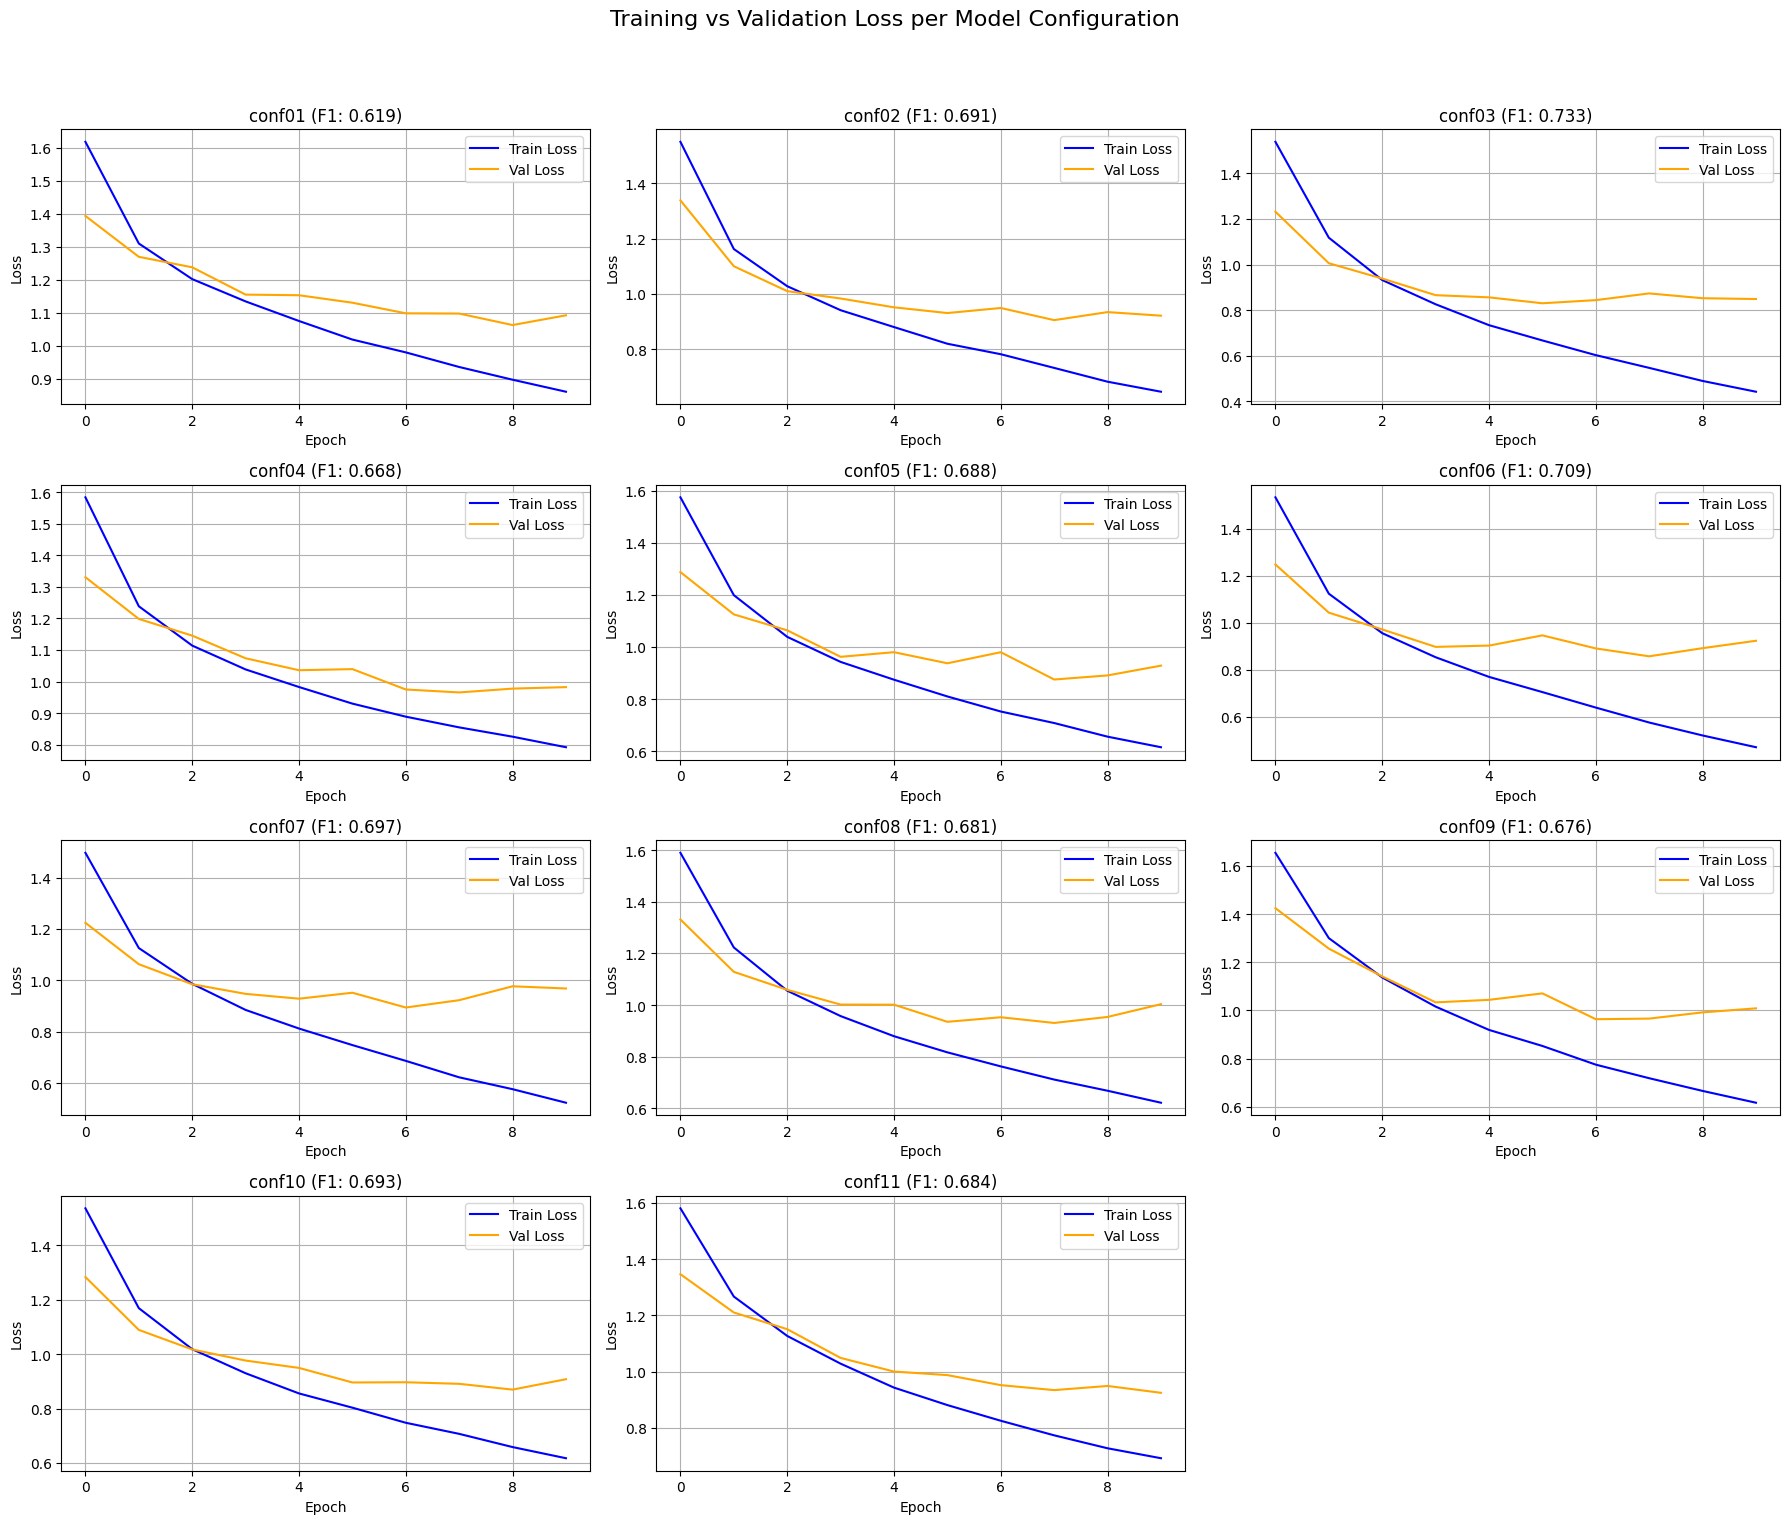

In [ ]:
n = len(results)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 4 * rows))
axes = axes.flatten()

for i, result in enumerate(results):
    ax = axes[i]
    ax.plot(result['history']['loss'], label='Train Loss', color='blue')
    ax.plot(result['history']['val_loss'], label='Val Loss', color='orange')
    ax.set_title(f"{result['id']} (F1: {result['f1_score']:.3f})")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Training vs Validation Loss per Model Configuration", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
